In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [2]:
def dist(x,y):

    x = np.expand_dims(x, axis = 1)
    y = np.expand_dims(y, axis = 1)
    
    d = np.zeros([x.shape[0], y.shape[0]])
    d= cdist(x, y)
    
    return d

(array([0.0014, 0.015 , 0.07  , 0.1935, 0.2909, 0.259 , 0.1249, 0.0388,
        0.0055, 0.001 ]),
 array([-0.82822005, -0.44405559, -0.05989114,  0.32427332,  0.70843778,
         1.09260224,  1.47676669,  1.86093115,  2.24509561,  2.62926007,
         3.01342452]),
 <BarContainer object of 10 artists>)

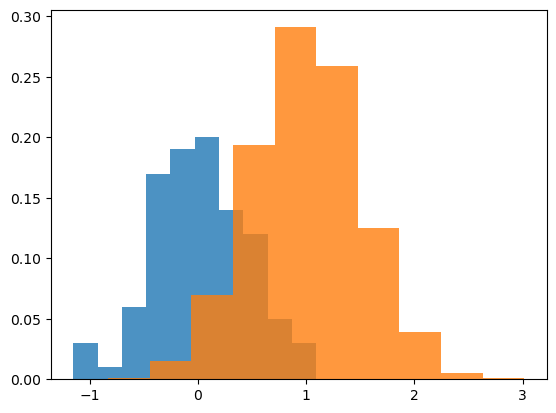

In [8]:
n = 100
m = 10000

mu, sigma = 0, 0.5

#distributions
seed = np.random.seed(seed = 1)

X = np.random.normal(mu, sigma, n)
Y = np.random.normal(mu + 1, sigma, m)

#weights
a = np.ones([n])
b = np.ones([m])

a_n = a/np.sum(a)
b_n = b/np.sum(b)

u = np.ones([n])
v = np.ones([m])

plt.hist(X, weights = a_n, bins = 10, alpha = 0.8)
plt.hist(Y, weights = b_n, bins = 10, alpha = 0.8)

In [ ]:
d = dist(X, Y)
print(d)

In [ ]:
M = dist(X,Y)

P = cp.Variable((n,m))

U = [0 <= P, cp.sum(P, axis = 1) <= b_n, cp.sum(P, axis = 0) <= a_n, cp.sum(cp.sum(P, axis = 1), axis = 0) == cp.minimum(cp.sum(a_n), cp.sum(b_n))]

objective = cp.Minimize(cp.sum(cp.sum(cp.multiply(P, M))) + cp.abs(cp.sum(a_n, axis = 0) - cp.sum(b_n, axis = 0)))

prob = cp.Problem(objective, U)
result = prob.solve(solver = cp.CVXOPT)

plt.imshow(P.value, cmap = 'viridis')

W = cp.sum(cp.multiply(P, M)).value

print(W)
print(P.value)

In [5]:
def wasserstein_dist(a, b, wa, wb):
    
    M = dist(a,b)

    P = cp.Variable((a.shape[0], b.shape[0]))

    U = [0 <= P, cp.sum(P, axis = 1) <= wa, cp.sum(P, axis = 0) <= wb, cp.sum(cp.sum(P, axis = 1), axis = 0) == cp.minimum(cp.sum(wa), cp.sum(wb))]

    objective = cp.Minimize(cp.sum(cp.sum(cp.multiply(P, M))) + cp.abs(cp.sum(wa, axis = 0) - cp.sum(wb, axis = 0)))

    prob = cp.Problem(objective, U)
    result = prob.solve(solver = cp.ECOS, verbose = True)

    # plt.imshow(P.value, cmap = 'viridis')

    W = cp.sum(cp.multiply(P, M)).value

    print(W)
    # print(P.value)

    return W

In [9]:
W_dist = wasserstein_dist(X, Y, a_n, b_n)

                                     CVXPY                                     
                                     v1.4.0                                    
(CVXPY) Oct 16 11:25:11 AM: Your problem has 1000000 variables, 4 constraints, and 0 parameters.
(CVXPY) Oct 16 11:25:11 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 16 11:25:11 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 16 11:25:11 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Oct 16 11:25:11 AM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 16 11:25:11 AM: Compiling problem (target solver=ECOS).

In [ ]:
M = dist(X,Y)

P2 = cp.Variable((n,m))

U2 = [0 <= P2, cp.sum(P2, axis = 1) <= a_n, cp.sum(P2, axis = 0) <= b, cp.sum(cp.sum(P2, axis = 1), axis = 0) == cp.minimum(cp.sum(a_n), cp.sum(b))]

objective2 = cp.Minimize(cp.sum(cp.sum(cp.multiply(P2, M))) + cp.abs(cp.sum(a_n, axis = 0) - cp.sum(b, axis = 0)))

prob2 = cp.Problem(objective2, U2)
result2 = prob2.solve(solver = cp.ECOS)

plt.imshow(P2.value, cmap = 'viridis')

W2 = cp.sum(cp.multiply(P2, M)).value

print(W2)
print(P2.value)

In [ ]:
# print(cp.sum(cp.sum(cp.multiply(P2, M))).value)
# print(cp.abs(cp.sum(a) - cp.sum(b)).value)
print(cp.sum(a_n).value)
print(cp.sum(b).value)